In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
n_samples = 1500

<AxesSubplot:xlabel='a', ylabel='b'>

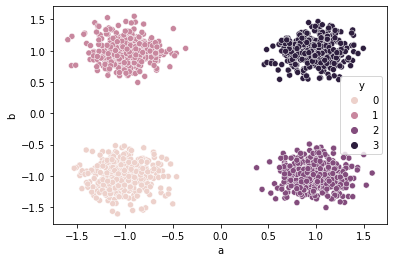

In [18]:
# create linearly inseparable data. Noise in middle of circle
#X, y = datasets.make_circles(n_samples=n_samples, random_state=1, noise=0.1, factor=0.1)

# create noisy moons dataset
#X, y = datasets.make_moons(n_samples=n_samples, noise=0.05)

#create s-curve dataset
#X, y = datasets.make_s_curve(n_samples=n_samples, noise=0.1, random_state=1)

#create clusters
X, y = datasets.make_blobs(n_samples=n_samples, n_features=4, cluster_std=0.2, centers=[(-1,-1),(-1,1),(1,-1),(1,1)], random_state=0)

# Store these in a pandas dataframe
df =pd.DataFrame(X)
df.columns=['a','b']
#df.columns=['a', 'b', 'c']
df["y"]=y

#plot
sns.scatterplot(data=df,x='a',y='b', hue="y")
#sns.scatterplot(data=df,x='a', y='b')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

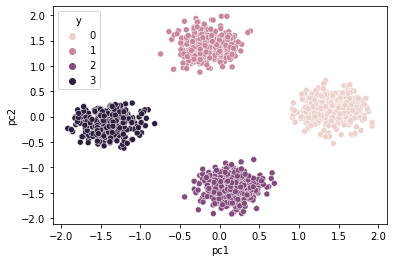

In [19]:
#Apply nornal (linear) PCA to data
scikit_pca = PCA(n_components=2)
X_pca = scikit_pca.fit_transform(X)

#store PCA results in a dataframe
pc_res = pd.DataFrame(X_pca)
pc_res.columns=["pc1","pc2"]
pc_res.head()
pc_res['y']=y

#Plot the data projected onto PC1 and PC2, coloured by group
sns.scatterplot(data=pc_res,x='pc1',y='pc2', hue='y')

<AxesSubplot:xlabel='a', ylabel='b'>

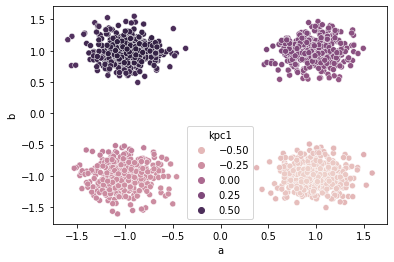

In [23]:
#Now try kernel PCA

kpca = KernelPCA(kernel="rbf", gamma=1, n_components=2)
#kpca = KernelPCA(kernel="linear", n_components=2)
#kpca = KernelPCA(kernel="poly", degree=2, n_components=2)
X_kpca = kpca.fit_transform(X)

#save to dataframe
kpca_res = pd.DataFrame(X_kpca)
kpca_res.columns=["kpc1","kpc2"]
kpca_res['y']=y
kpca_res.head()

#plot
#sns.scatterplot(data=kpca_res,x='kpc1',y='kpc2', hue="y")

#plot
#sns.scatterplot(data=df,x='a',y='b', hue="y")
df['kpc1']=kpca_res['kpc1']
df['kpc2']=kpca_res['kpc2']
#df['kpc3']=kpca_res['kpc3']
sns.scatterplot(data=df,x='a', y='b', hue='kpc1')
#sns.scatterplot(data=df,x='a', y='kpc1', hue='y')